In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [130]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

--2020-11-09 19:33:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811065 (792K) [application/octet-stream]
Saving to: ‘Golden_State.pkl.6’

Golden_State.pkl.6  100%[===================>] 792.06K  3.06MB/s    in 0.3s    

2020-11-09 19:33:20 (3.06 MB/s) - ‘Golden_State.pkl.6’ saved [811065/811065]



In [194]:
file_name = "Golden_State.pkl"
df_games = pd.read_pickle(file_name)
df_games.head(30)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0
5,22019,1610612744,GSW,Golden State Warriors,1321900005,2019-07-03,GSW vs. MIA,L,240,65,...,0.800,10.0,27.0,37.0,11,5.0,3,21.0,19,-6.0
6,22019,1610612744,GSW,Golden State Warriors,1321900003,2019-07-02,GSW vs. LAL,L,242,90,...,0.677,9.0,22.0,31.0,18,9.0,6,20.0,19,-7.6
7,22019,1610612744,GSW,Golden State Warriors,1321900002,2019-07-01,GSW @ SAC,L,240,77,...,0.708,7.0,29.0,36.0,13,7.0,4,17.0,25,-4.0
8,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9.0,6,16.0,23,-4.0
9,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5.0,7,15.0,22,1.0


In [195]:
#df_gsw_game = df_games[df_games['WL'] == 'L']
df_gsw_game = df_games[['TEAM_ABBREVIATION','GAME_DATE','MATCHUP','WL','MIN','PTS','PLUS_MINUS']]
df_gsw_game.head(10)

,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,WL,MIN,PTS,PLUS_MINUS
0,GSW,2019-07-12,GSW vs. LAL,L,200,87,3.2
1,GSW,2019-07-10,GSW @ DEN,W,201,73,-8.0
2,GSW,2019-07-08,GSW @ LAL,W,200,88,8.0
3,GSW,2019-07-07,GSW vs. TOR,W,201,80,10.0
4,GSW,2019-07-05,GSW vs. CHA,L,200,85,-8.0
5,GSW,2019-07-03,GSW vs. MIA,L,240,65,-6.0
6,GSW,2019-07-02,GSW vs. LAL,L,242,90,-7.6
7,GSW,2019-07-01,GSW @ SAC,L,240,77,-4.0
8,GSW,2019-06-13,GSW vs. TOR,L,240,110,-4.0
9,GSW,2019-06-10,GSW @ TOR,W,240,106,1.0


In [174]:
print(df_gsw_game.dtypes)

TEAM_ABBREVIATION     object
GAME_DATE             object
MATCHUP               object
WL                     int64
MIN                    int64
PTS                    int64
PLUS_MINUS           float64
dtype: object


In [197]:
df_gsw_game = df_gsw_game.replace(to_replace="W", value=1)

In [198]:
df_gsw_game = df_gsw_game.replace(to_replace="L", value=0)

In [199]:
df_gsw_game.head(10)

,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,WL,MIN,PTS,PLUS_MINUS
0,GSW,2019-07-12,GSW vs. LAL,0.0,200,87,3.2
1,GSW,2019-07-10,GSW @ DEN,1.0,201,73,-8.0
2,GSW,2019-07-08,GSW @ LAL,1.0,200,88,8.0
3,GSW,2019-07-07,GSW vs. TOR,1.0,201,80,10.0
4,GSW,2019-07-05,GSW vs. CHA,0.0,200,85,-8.0
5,GSW,2019-07-03,GSW vs. MIA,0.0,240,65,-6.0
6,GSW,2019-07-02,GSW vs. LAL,0.0,242,90,-7.6
7,GSW,2019-07-01,GSW @ SAC,0.0,240,77,-4.0
8,GSW,2019-06-13,GSW vs. TOR,0.0,240,110,-4.0
9,GSW,2019-06-10,GSW @ TOR,1.0,240,106,1.0


In [228]:
df_gsw_game_clustering = df_gsw_game[['WL','PTS','PLUS_MINUS']]
df_gsw_game_clustering.head()

,WL,PTS,PLUS_MINUS
0,0.0,87,3.2
1,1.0,73,-8.0
2,1.0,88,8.0
3,1.0,80,10.0
4,0.0,85,-8.0


In [229]:
missing_data = df_gsw_game_clustering.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

WL
False    3237
True        1
Name: WL, dtype: int64

PTS
False    3238
Name: PTS, dtype: int64

PLUS_MINUS
False    2116
True     1122
Name: PLUS_MINUS, dtype: int64



In [230]:
df_gsw_game_clustering['PLUS_MINUS'].replace(np.nan, 0, inplace=True)
#df_gsw_game_clustering = df_gsw_game_clustering.replace(to_replace="W", value=1)
#df_gsw_game_clustering = df_gsw_game_clustering.replace(to_replace="L", value=0)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [231]:
#avg_bore=df_gsw_game_clustering['WL'].astype('float').mean(axis=0)
#print("Average of bore:", avg_bore)

In [232]:
#df_gsw_game_clustering["WL"].replace(np.nan, avg_bore, inplace=True)

In [233]:
X = df_gsw_game_clustering.values[:,1:]
X = np.nan_to_num(X)

In [234]:
# Using K-Means to cluster
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [235]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [236]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 3, 1, ..., 0, 1, 1], dtype=int32)

In [237]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[121.22843256,   0.55601458],
       [102.05069802,   1.27215283],
       [118.50132626,  21.51458886],
       [ 87.31757755, -13.68803545]])

In [238]:
df_gsw_game_clustering.insert(0, 'Cluster Labels', k_means.labels_)

In [239]:
df_gsw_game_clustering.groupby('Cluster Labels').mean()

,WL,PTS,PLUS_MINUS
Cluster Labels,,,
0,0.645200,121.228433,0.556015
1,0.464364,102.050698,1.272153
2,1.000000,118.501326,21.514589
3,0.042899,87.317578,-13.688035


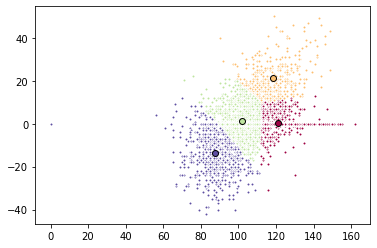

In [242]:
k_means3 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

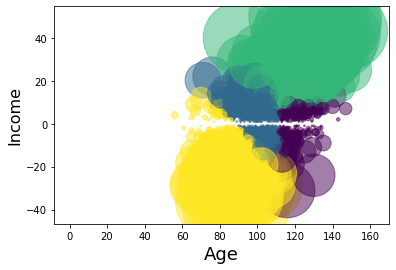

In [241]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
